In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


MovieWriter imagemagick unavailable; using Pillow instead.


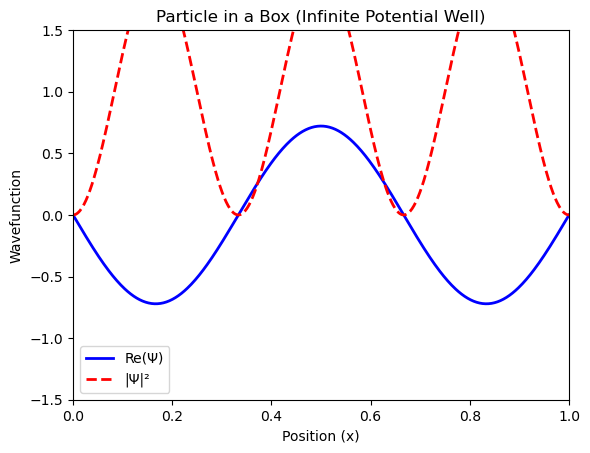

In [4]:
# Constants
L = 1.0  # Length of the box
n = 3    # Quantum number
hbar = 1.0  # Reduced Planck's constant
m = 1.0  # Mass of the particle
omega = (n * np.pi / L)**2 * hbar / (2 * m)  # Angular frequency for energy level n

# Spatial grid
x = np.linspace(0, L, 500)

# Wavefunction for particle in a box
def wavefunction(x, t, n):
    """
    Time-dependent wavefunction for the particle in a box.
    """
    psi_x = np.sqrt(2 / L) * np.sin(n * np.pi * x / L)  # Spatial part
    psi_t = np.exp(-1j * omega * t)  # Time-dependent part
    return psi_x * psi_t

# Initialize the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Wavefunction")
ax.set_title("Particle in a Box (Infinite Potential Well)")

# Plot elements
line_wave, = ax.plot([], [], 'b', label="Re(Ψ)", lw=2)
line_prob, = ax.plot([], [], 'r--', label="|Ψ|²", lw=2)
ax.legend()

# Update function for animation
def update(frame):
    t = frame / 10.0  # Time step
    psi = wavefunction(x, t, n)
    prob_density = np.abs(psi)**2  # Probability density
    
    # Update the wavefunction and probability density plots
    line_wave.set_data(x, psi.real)  # Real part of Ψ
    line_prob.set_data(x, prob_density)  # |Ψ|²
    return line_wave, line_prob

# Create animation
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Save the animation as a GIF (optional)
ani.save('particle_in_box.gif', writer='imagemagick')

# Show the animation
plt.show()
